# Plots from the Experiments

In [1]:
# Libraries
import io
import json
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## "Fuffa" Experiment
0: Logistic Regression
1: SVM
2: Knn
3: adaboost
4: xgboost
5: Random Forest
6: ExtraTrees
7: MLP

## BOHB

In [11]:
base = "experiments/Tuner_Curves_BOHB/"
names = ["test_logistic/", "test_svm/", "test_knn/", "test_ada/", "test_xgb/", "test_rf/", "test_extra_trees/", "test_mlp/"]
datas = []
for elem in names:
    name = base + elem + "results_bohb.json"
    with io.open(name, 'rb') as json_file:
        data = json.load(json_file)
        datas.append(deepcopy(data))

In [12]:
results_raw = []
results = []
pops = 100

for i, data in enumerate(datas):
    conf_num = len(data["configs"])
    res = np.zeros(conf_num)
    for j in range(conf_num):
        res[j] = 1 - data["data"][j][1][0]
    results_raw.append(res)

for i, elem in enumerate(results_raw):
    j = 0
    conf_num = len(elem)
    res = []
    while j < conf_num:
        res.append(elem[j:j+3].mean())
        j+=3
    results.append(deepcopy(res))

<Figure size 640x480 with 0 Axes>

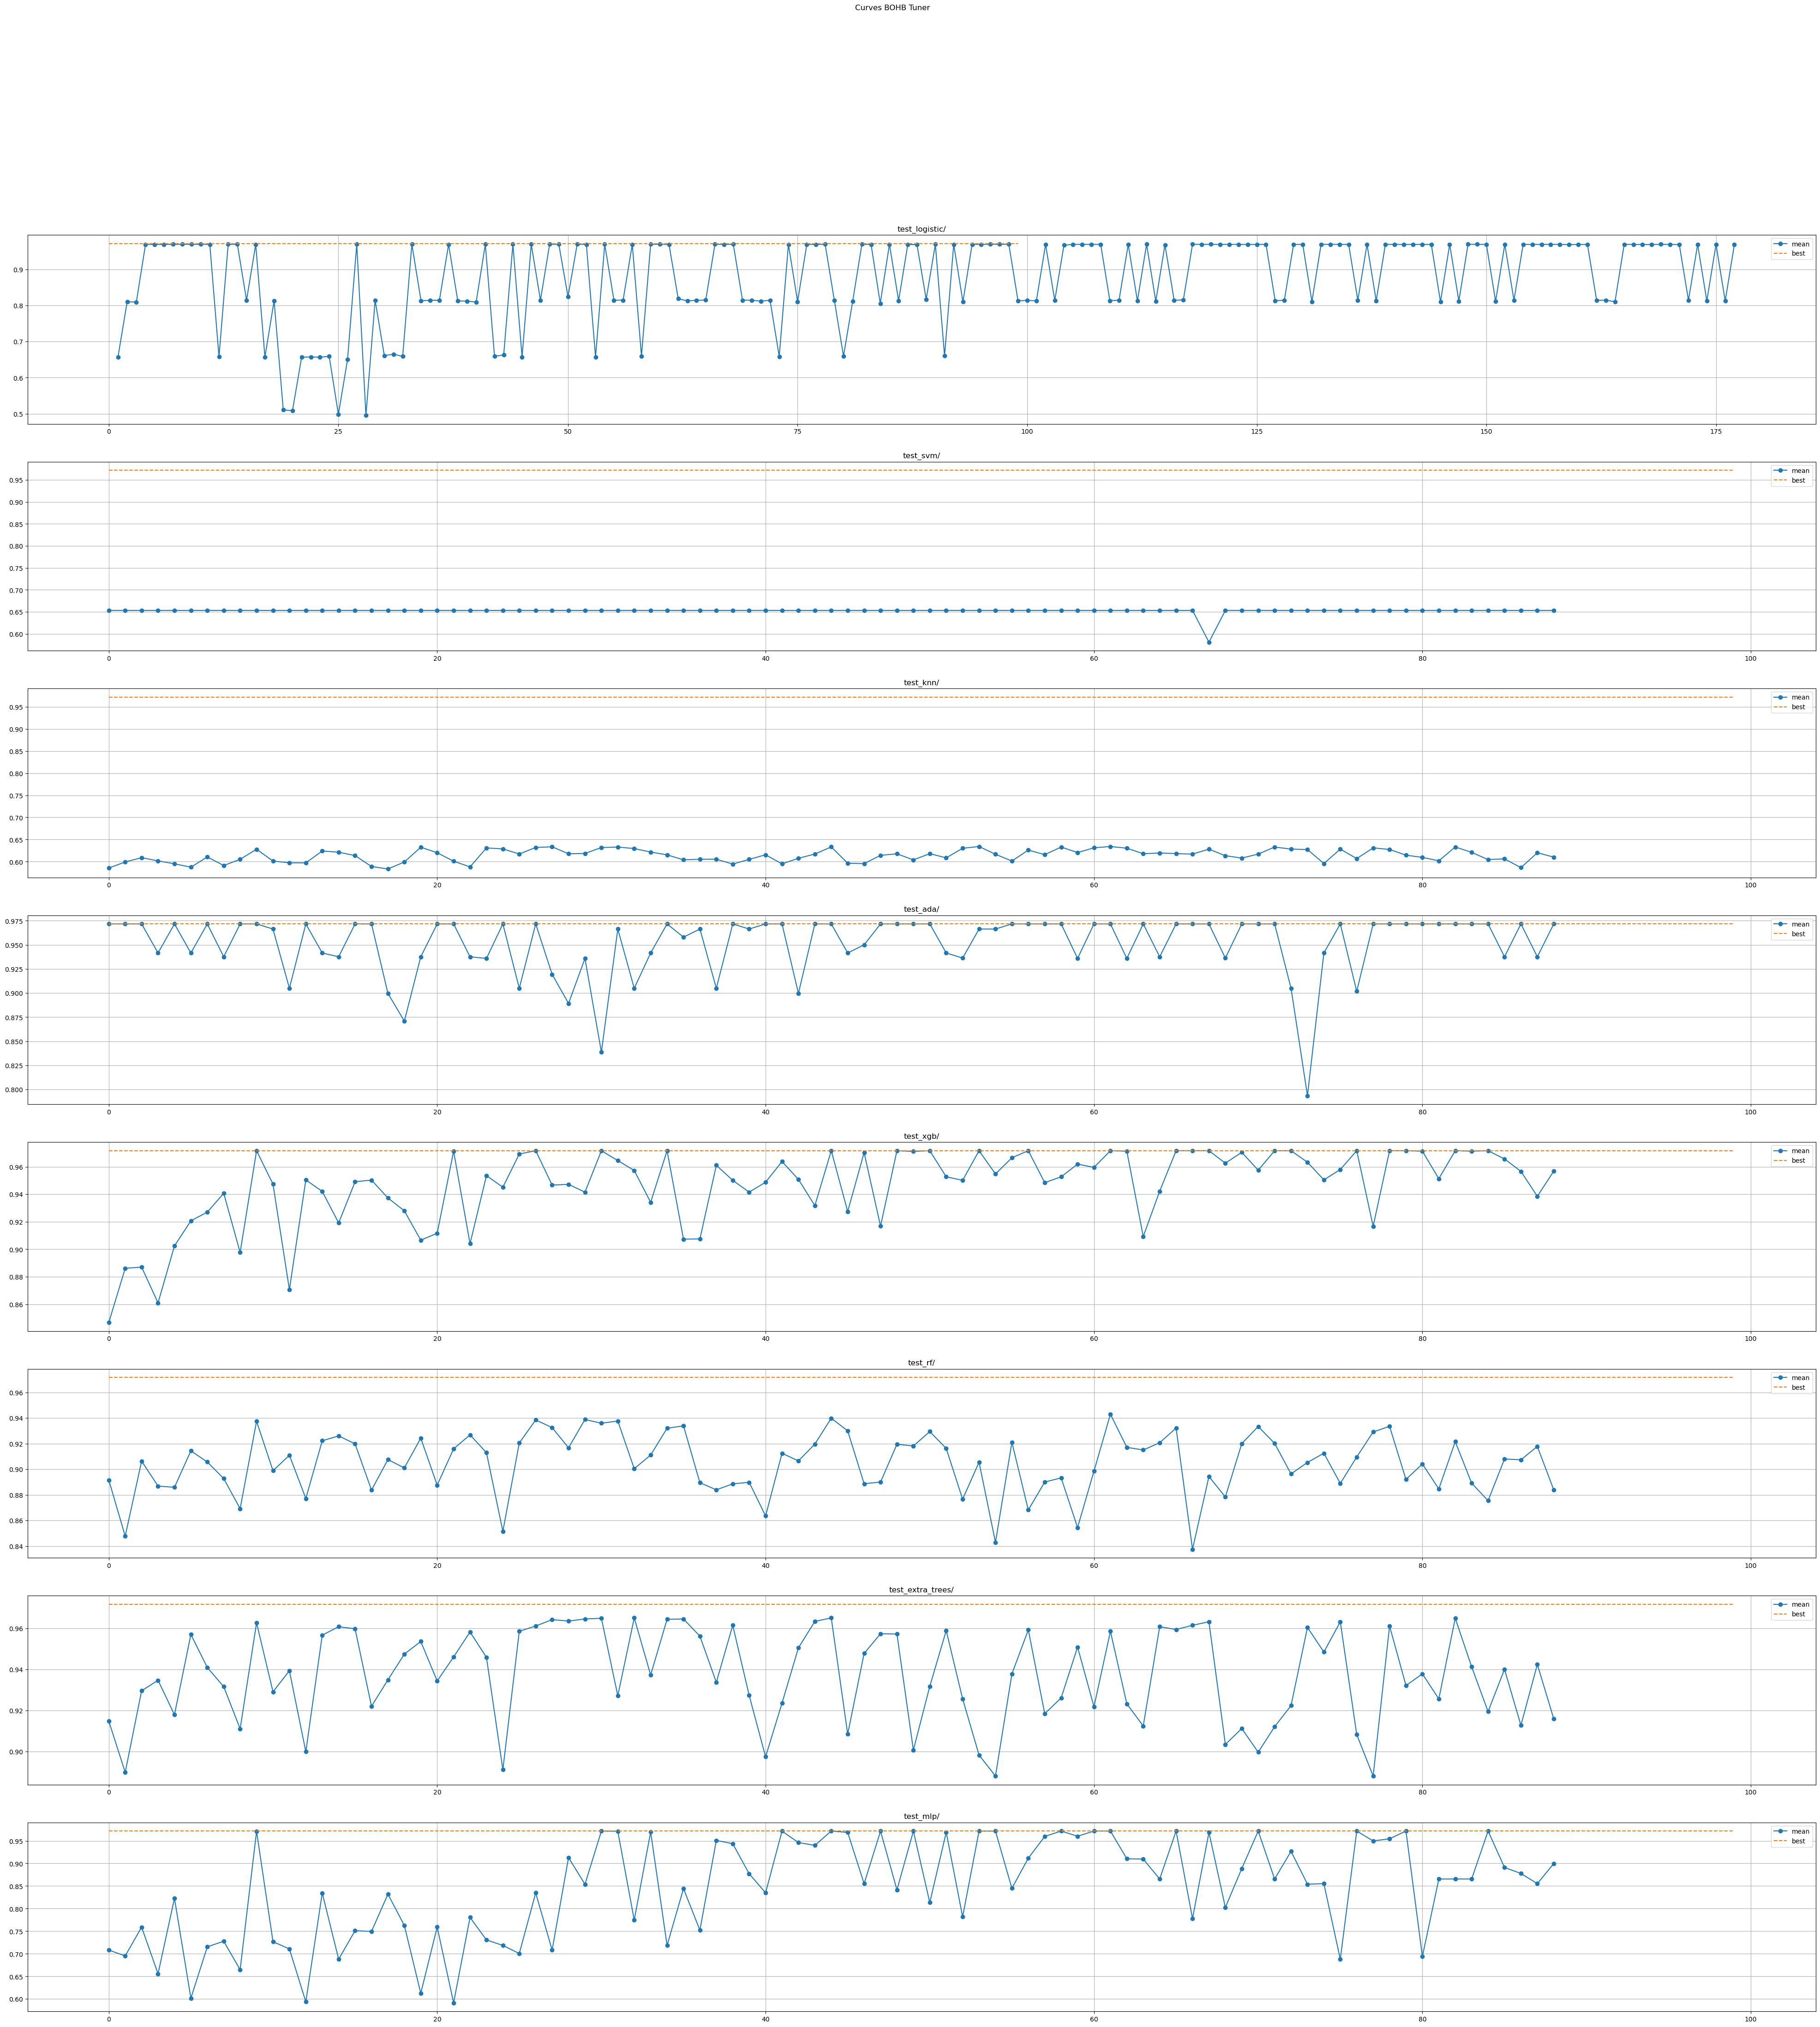

In [13]:
plt.clf()
fig, axs = plt.subplots(len(names), figsize=(50, 50))
fig.suptitle("Curves BOHB Tuner")
opt = 0.9716
for i, elem in enumerate(names):
    axs[i].clear()
    axs[i].plot(results[i], "-o", label="mean")
    axs[i].plot(np.arange(pops), opt * np.ones(pops), "--", label="best")
    axs[i].grid()
    axs[i].legend(loc="best")
    axs[i].set_title(elem)
plt.show()

## SMAC

In [14]:
base = "experiments/Tuner_Curves_SMAC/"
names = ["test_logistic/", "test_svm/", "test_knn/", "test_ada/", "test_xgb/", "test_rf/", "test_extra_trees/", "test_mlp/"]
datas = []
for elem in names:
    name = base + elem + "results_smac.json"
    with io.open(name, 'rb') as json_file:
        data = json.load(json_file)
        datas.append(deepcopy(data))

In [15]:
results_raw = []
results = []
pops = 100

for i, data in enumerate(datas):
    conf_num = len(data["configs"])
    res = np.zeros(conf_num)
    for j in range(conf_num):
        res[j] = 1 - data["data"][j][1][0]
    results_raw.append(res)

for i, elem in enumerate(results_raw):
    j = 0
    conf_num = len(elem)
    res = []
    while j < conf_num:
        res.append(elem[j:j+3].mean())
        j+=3
    results.append(deepcopy(res))

<Figure size 640x480 with 0 Axes>

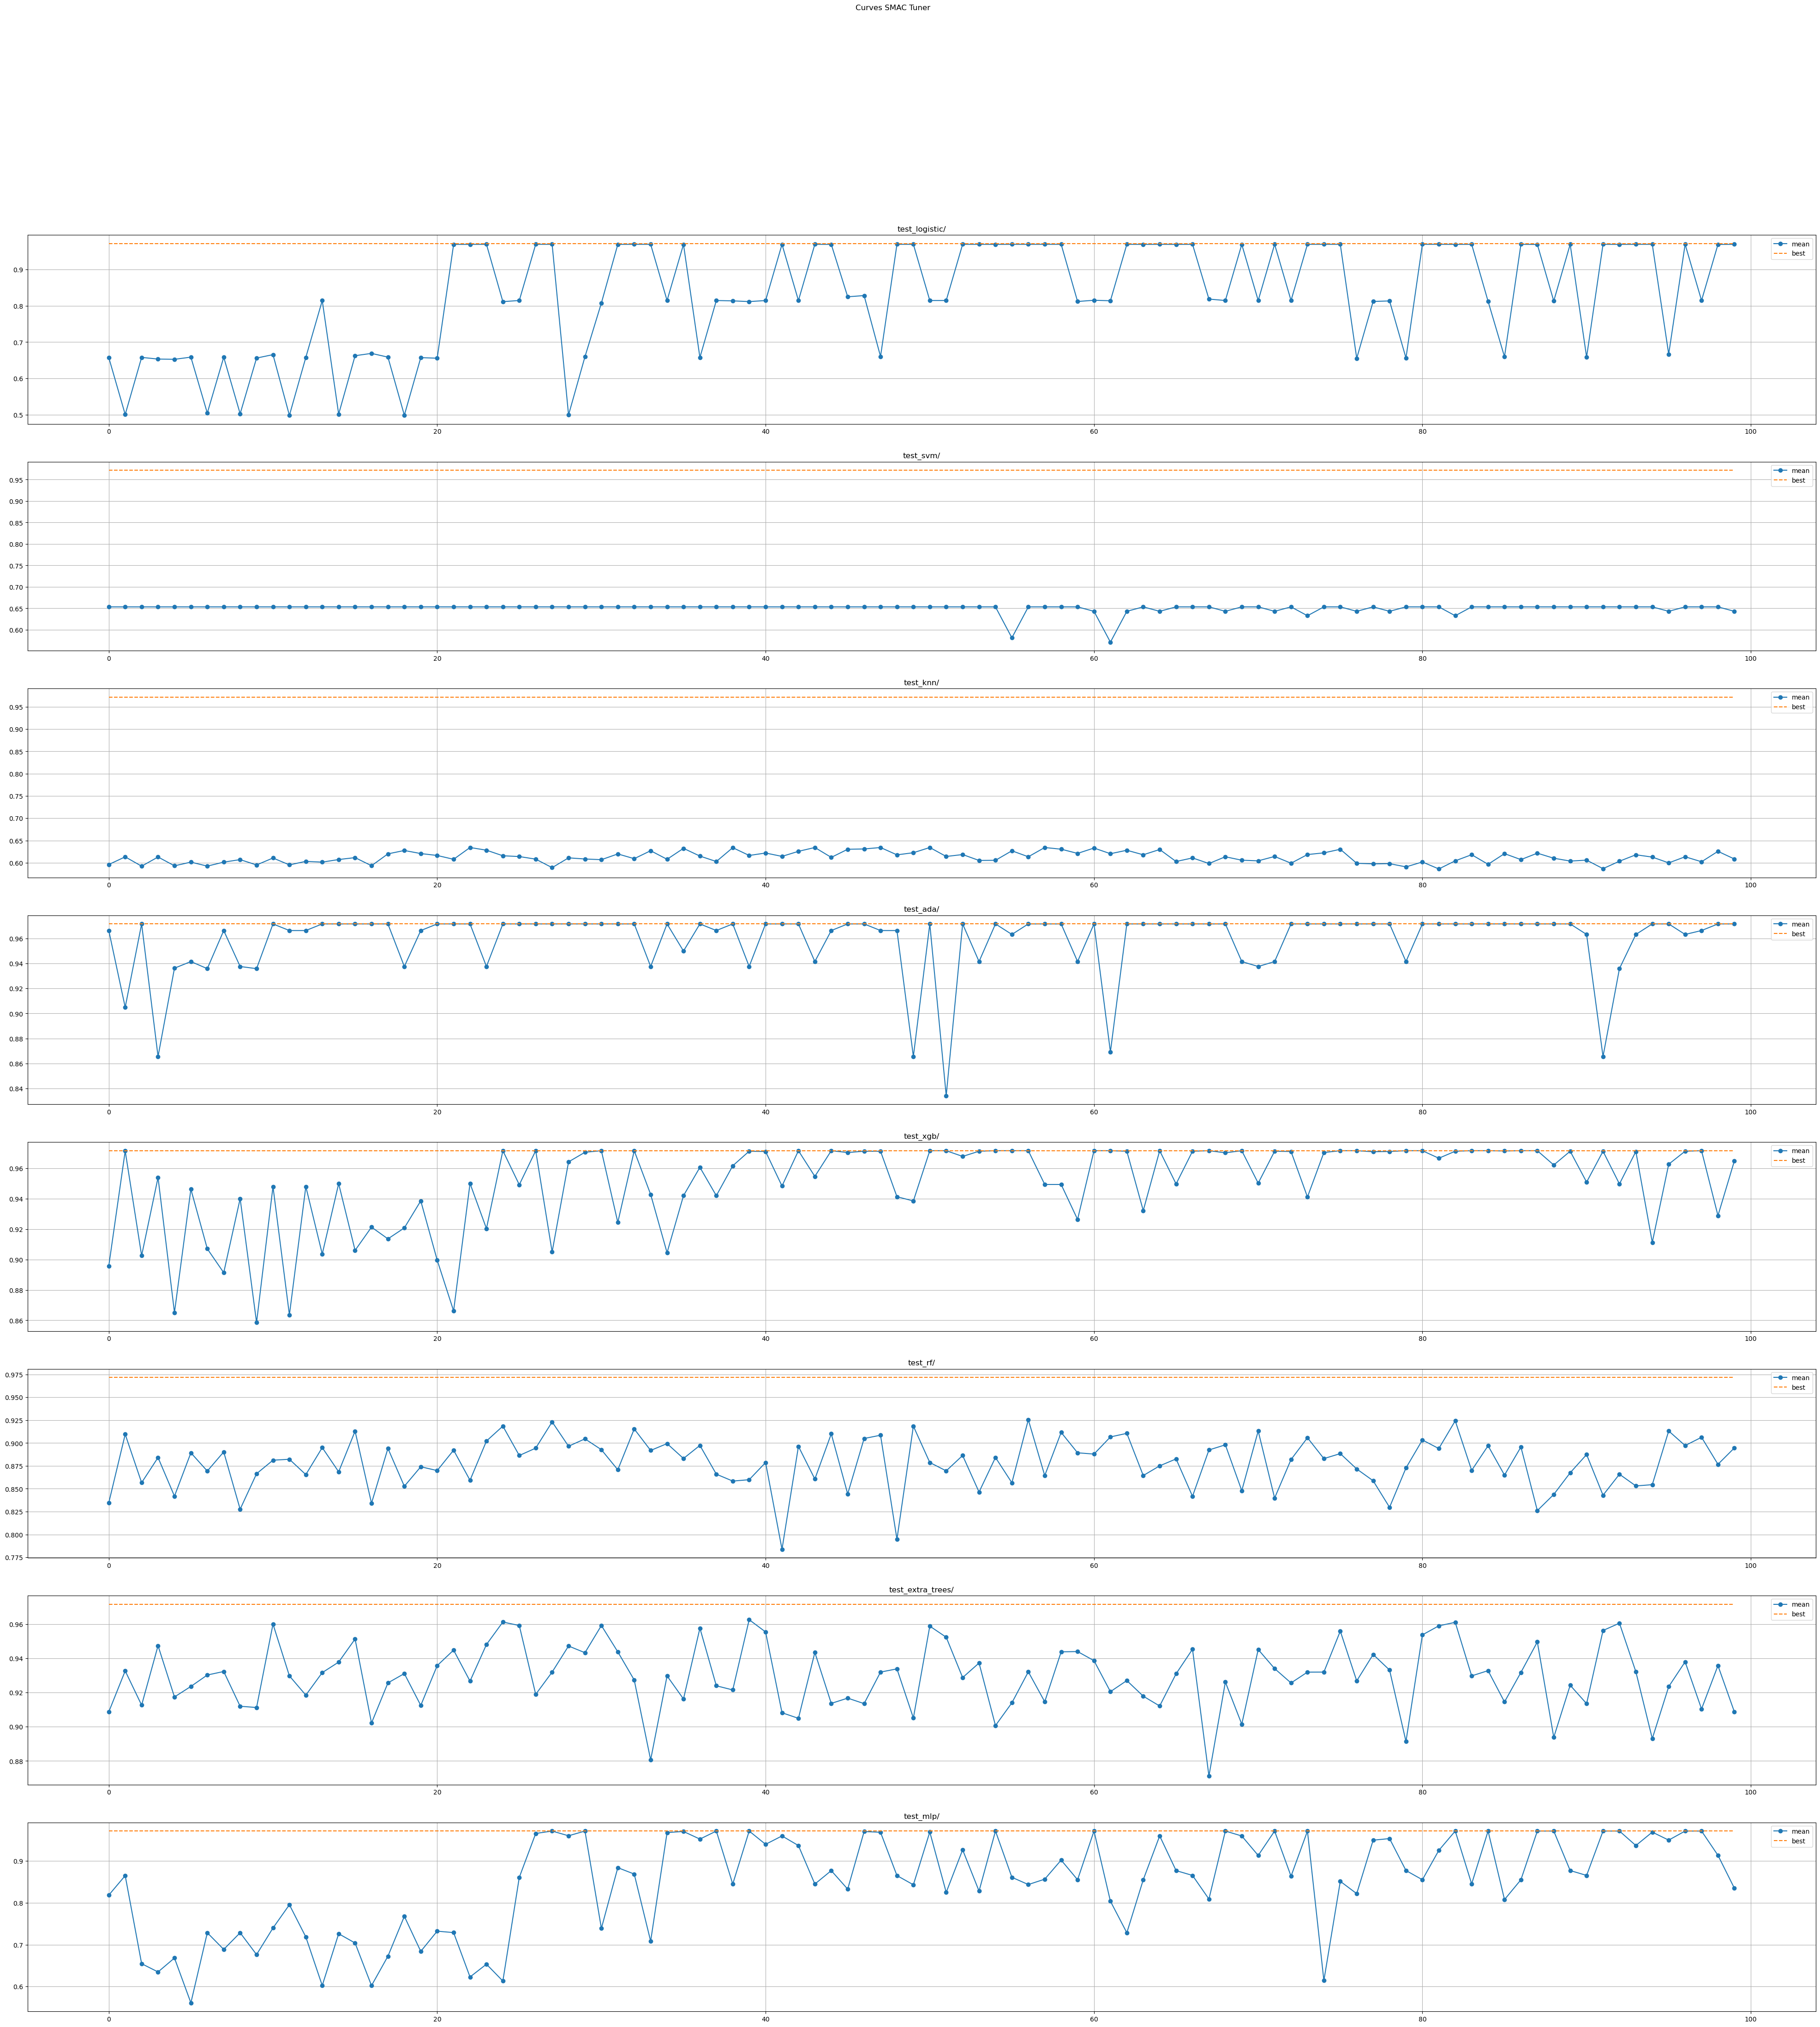

In [16]:
plt.clf()
fig, axs = plt.subplots(len(names), figsize=(50, 50))
fig.suptitle("Curves SMAC Tuner")
opt = 0.9716
for i, elem in enumerate(names):
    axs[i].clear()
    axs[i].plot(results[i], "-o", label="mean")
    axs[i].plot(np.arange(pops), opt * np.ones(pops), "--", label="best")
    axs[i].grid()
    axs[i].legend(loc="best")
    axs[i].set_title(elem)
plt.show()

## Genetic

In [17]:
base = "../experiments/test_genetic/"
names = ["test_log_reg/", "test_svm/", "test_knn/", "test_ada/", "test_xgb/", "test_rf/", "test_et/", "test_mlp/"]

In [18]:
datas = []
for elem in names:
    name = base + elem + "GeneticTuner_results.json"
    with io.open(name, 'rb') as json_file:
        data = json.load(json_file)
        datas.append(deepcopy(data))

In [19]:
pops = 100
agents_per_pop = 10
results_mean = []
results_median = []

for data in datas:
    i = 0
    res_mean = np.zeros(pops)
    res_med = np.zeros(pops)
    for k in data:
        tmp = []
        for elem in data[k]:
            tmp.append(elem["block_eval"])
        tmp = np.array(tmp)
        print(tmp)
        res_mean[i] = np.mean(tmp)
        res_med[i] = np.median(tmp)
        i+=1
    results_mean.append(res_mean)
    results_median.append(res_med)

[0.49616178 0.50493259 0.96958763 0.96958763 0.96958763 0.96958763
 0.96907216 0.5023447  0.50182924 0.49822099]
[0.96958763 0.96958763 0.96958763 0.96958763 0.96958763 0.96907216
 0.50493259 0.96958763 0.5023447  0.96958763]
[0.96958763 0.50493259 0.50493259 0.96958763 0.96958763 0.96958763
 0.96958763 0.96598996 0.96958763 0.96958763]
[0.96958763 0.96958763 0.96958763 0.50231827 0.96958763 0.96958763
 0.96958763 0.96958763 0.96958763 0.96958763]
[0.96958763 0.50131642 0.50493259 0.96958763 0.96958763 0.96958763
 0.96958763 0.96958763 0.96958763 0.96958763]
[0.96958763 0.96958763 0.96958763 0.96958763 0.50079566 0.50182924
 0.50493259 0.96958763 0.96958763 0.96958763]
[0.96958763 0.96958763 0.96958763 0.96958763 0.96958763 0.50182924
 0.96958763 0.96958763 0.49103093 0.96958763]
[0.96958763 0.48432461 0.96958763 0.96958763 0.96958763 0.96907216
 0.96958763 0.96907216 0.96907216 0.49512821]
[0.96958763 0.96958763 0.96958763 0.96958763 0.50182924 0.96907216
 0.96958763 0.96958763 0.9695

<Figure size 640x480 with 0 Axes>

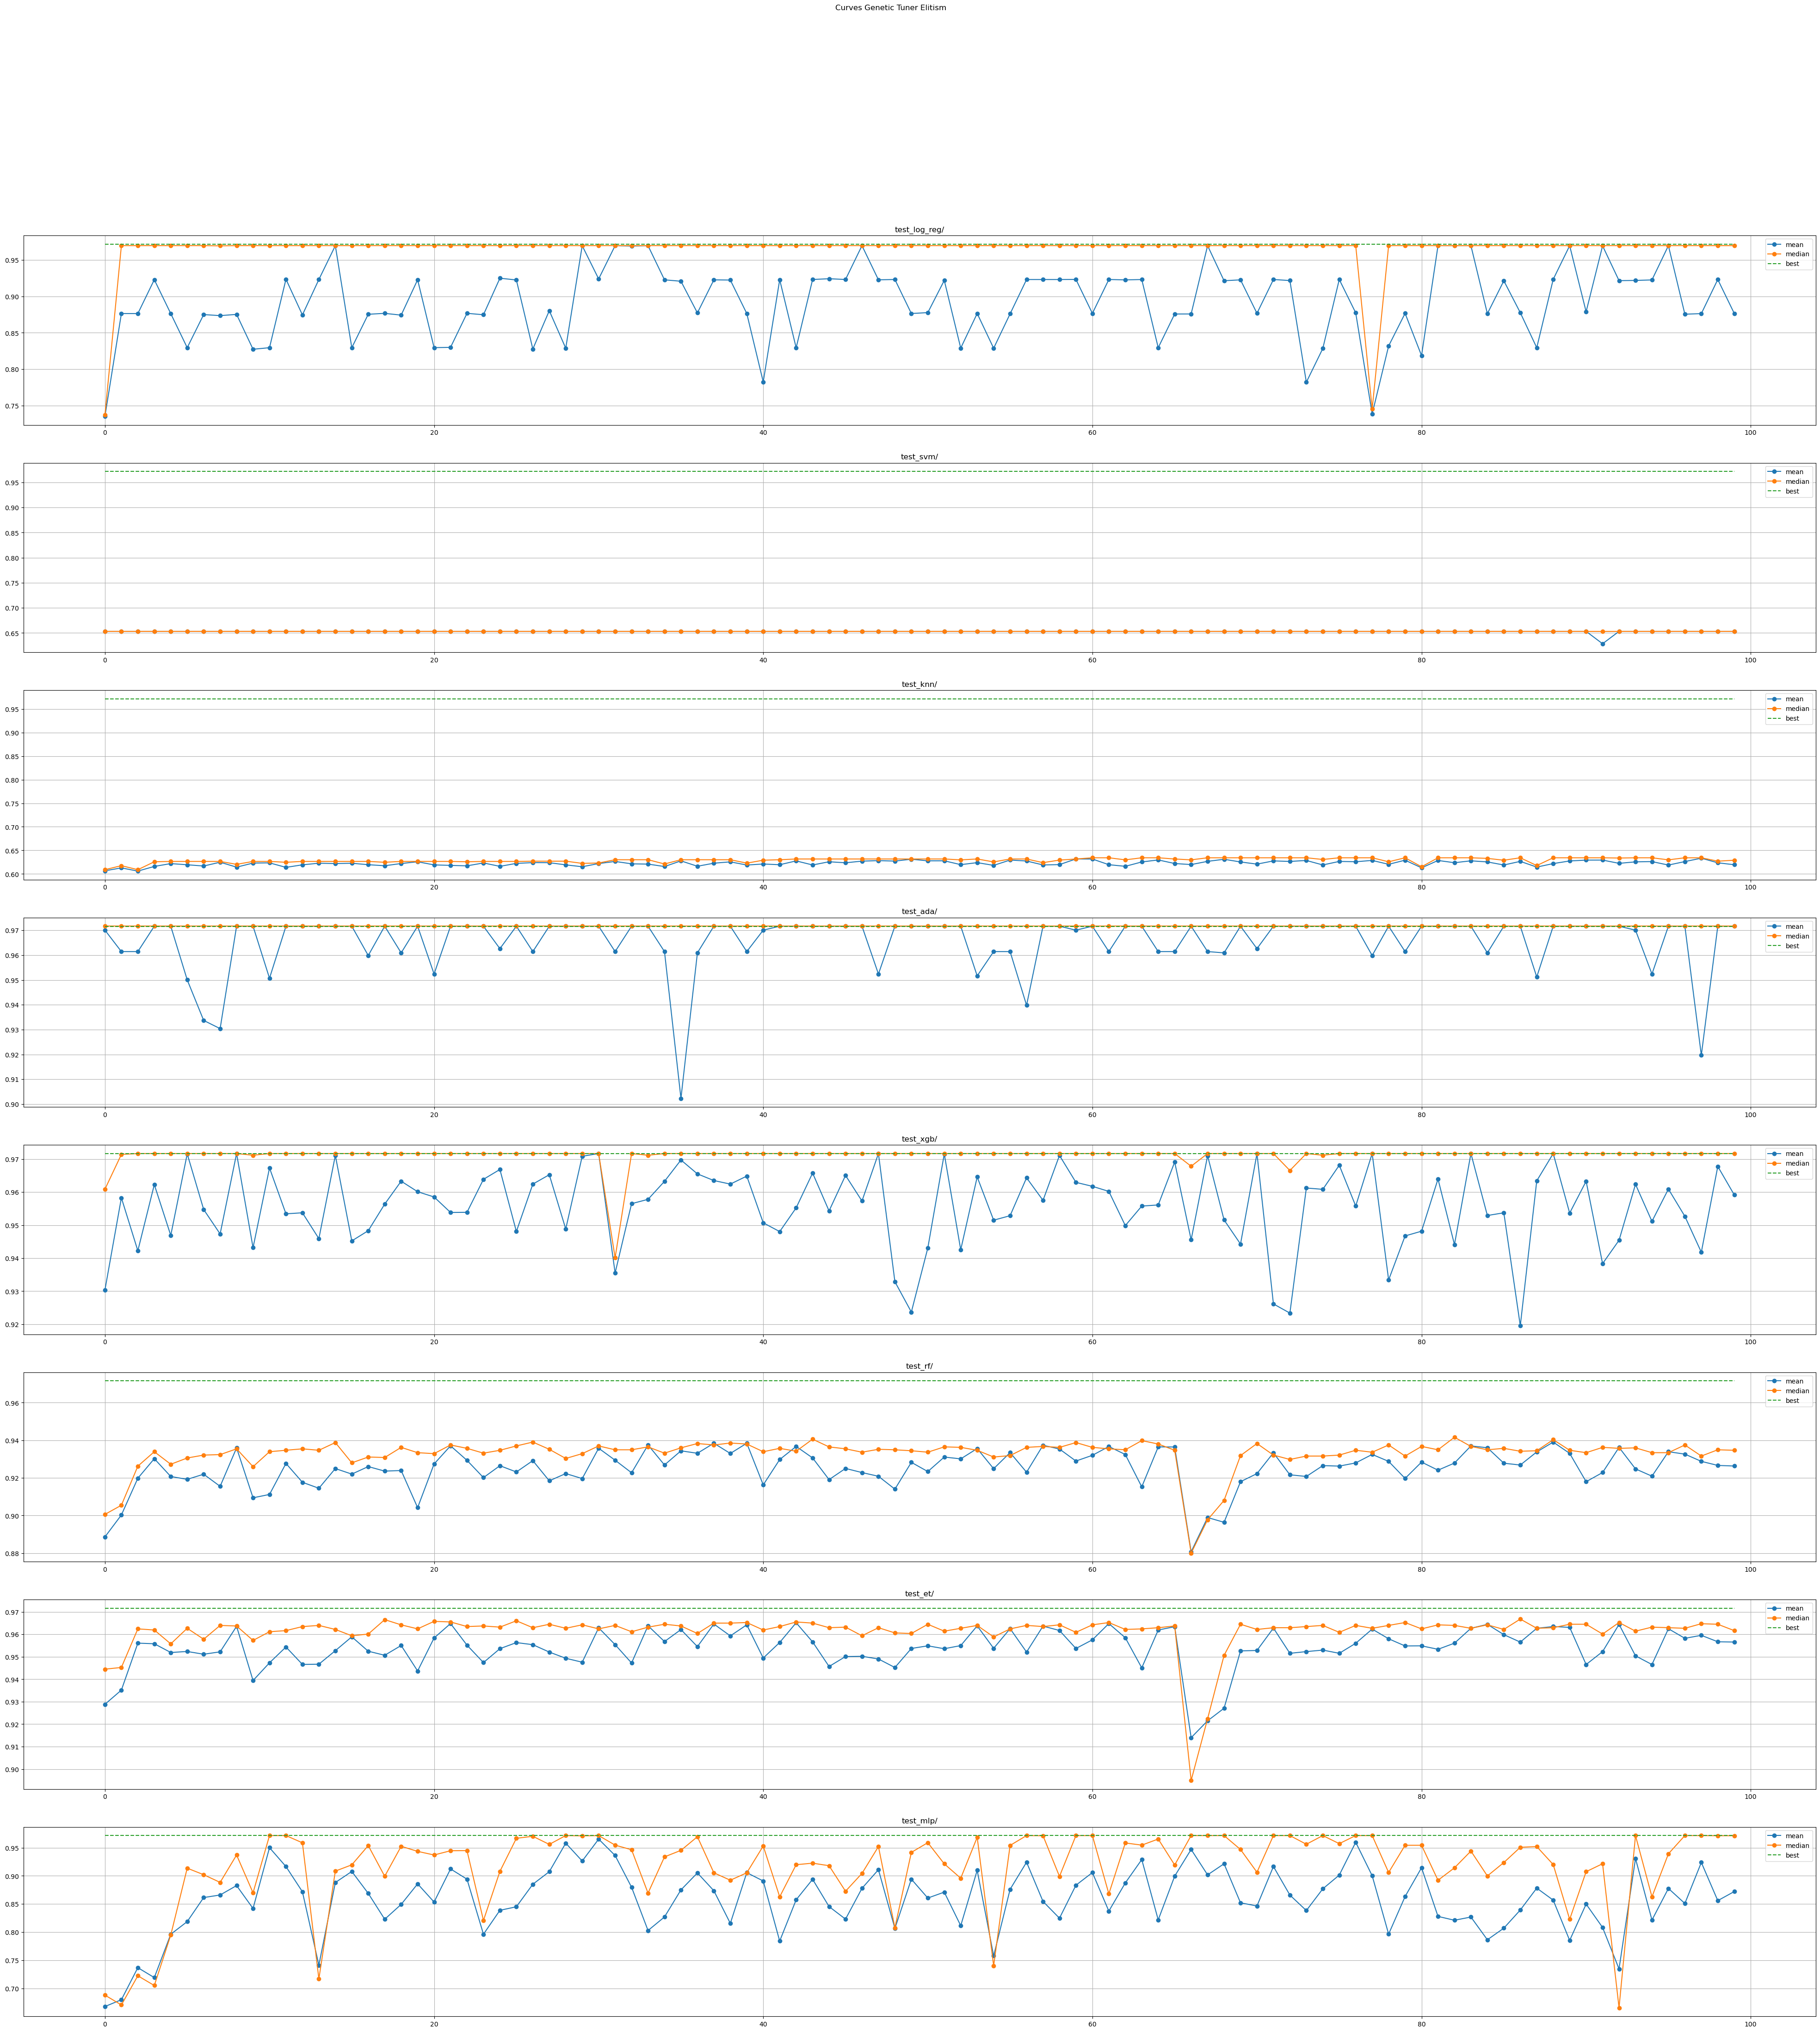

In [20]:
plt.clf()
fig, axs = plt.subplots(len(names), figsize=(50, 50))
fig.suptitle("Curves Genetic Tuner Elitism")
opt = 0.9716
for i, elem in enumerate(names):
    axs[i].clear()
    axs[i].plot(results_mean[i], "-o", label="mean")
    axs[i].plot(results_median[i], "-o", label="median")
    axs[i].plot(np.arange(pops), opt * np.ones(pops), "--", label="best")
    axs[i].grid()
    axs[i].legend(loc="best")
    axs[i].set_title(elem)
plt.show()